# Assignment 4: Instrument Recognition with Spectrogram
Author: Jacopo Raffi.

Libraries and utility variables used for the assignment code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import librosa

In [3]:
VIOLIN_PATH = "./data/Violin/violin_"
VIOLA_PATH = "./data/Viola/viola_"
TRUMPET_PATH = "./data/Trumpet/trumpet_"
TROMBONE_PATH = "./data/Trombone/trombone_"
EXTENSION = ".mp3"

FUNDAMENTAL_FREQUENCY = {'A5': 880.00, 
                         'B5': 987.77, 
                         'C5': 523.25, 
                         'D5': 587.33, 
                         'E5': 659.26, 
                         'F5': 698.46, 
                         'G5': 783.99} #Hz

### Spectrogram Calculation Technique

Librosa using STFT (Short Time Fourier Transform)

In [4]:
# dirty function to plot each instrument for a single musical note
def instrument_plot(musical_note:str, amplitude:bool = True):
    trumpet_file = TRUMPET_PATH + musical_note + EXTENSION
    trombone_file = TROMBONE_PATH + musical_note + EXTENSION
    violin_file = VIOLIN_PATH + musical_note + EXTENSION
    viola_file = VIOLA_PATH + musical_note + EXTENSION 
    
    y_tr, sr_tr = librosa.load(trumpet_file, sr=None)
    y_tro, sr_tro = librosa.load(trombone_file, sr=None)
    y_violin, sr_violin = librosa.load(violin_file, sr=None)
    y_viola, sr_viola = librosa.load(viola_file, sr=None)
    
    if amplitude: # apply ampitude to db
        instruments = {'trumpet' : (librosa.amplitude_to_db(np.abs(librosa.stft(y_tr)), ref=np.max), sr_tr), 
                       'trombone': (librosa.amplitude_to_db(np.abs(librosa.stft(y_tro)), ref=np.max), sr_tro), 
                       'violin': (librosa.amplitude_to_db(np.abs(librosa.stft(y_violin)), ref=np.max), sr_violin), 
                       'viola': (librosa.amplitude_to_db(np.abs(librosa.stft(y_viola)), ref=np.max), sr_viola)}
    else:
        instruments = {'trumpet' : (librosa.stft(y_tr), sr_tr), 
                       'trombone': (librosa.stft(y_tro), sr_tro), 
                       'violin': (librosa.stft(y_violin), sr_violin), 
                       'viola': (librosa.stft(y_viola), sr_viola)}
    
    fg, axes = plt.subplots(1, 4, figsize=(25,4)) 

    for i, instr in enumerate(instruments):
        D = instruments[instr][0]
        sr_i = instruments[instr][1]

        librosa.display.specshow(D, sr=sr_i, x_axis='time', y_axis='log', ax=axes[i])
        axes[i].set_title(instr)
        axes[i].set_ylabel("Hz")

    title = f"Spectrogram {musical_note} ({FUNDAMENTAL_FREQUENCY[musical_note]} Hz)" #Spectrogram " + musical_note + str(FUNDAMENTAL_FREQUENCY[musical_note])
    fg.suptitle(title)
    plt.show()
    

## Instrument chosen to compare:

For the analysis, four instruments have been chosen:
- Viola;
- Violin;
- Trumpet;
- Trombone. 

This selection enables the exploration of distinctions and similarities not only between different instrument classes but also within the same class.

## Prior Consideration

- Different note same scale (5);
- Black part(for all frequencies) is because the audio is silent (beginning or end).

### A5 - Frequency 880 Hz

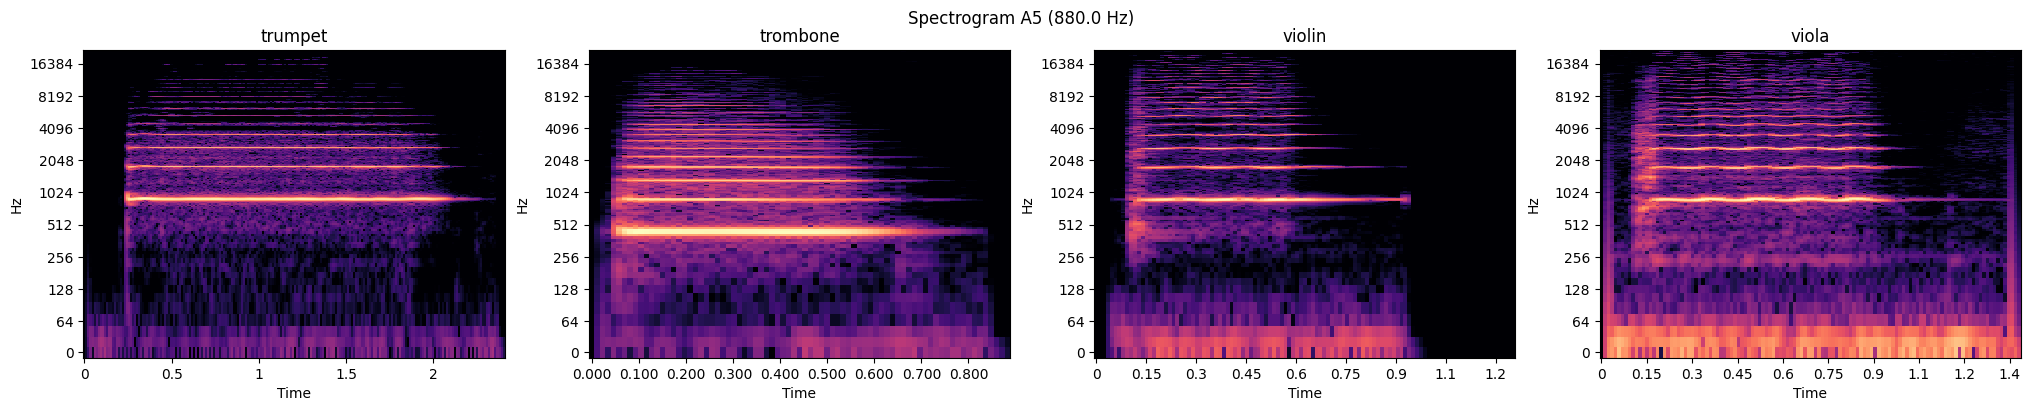

In [5]:
instrument_plot("A5")

### B5 - Frequency 987.77 Hz

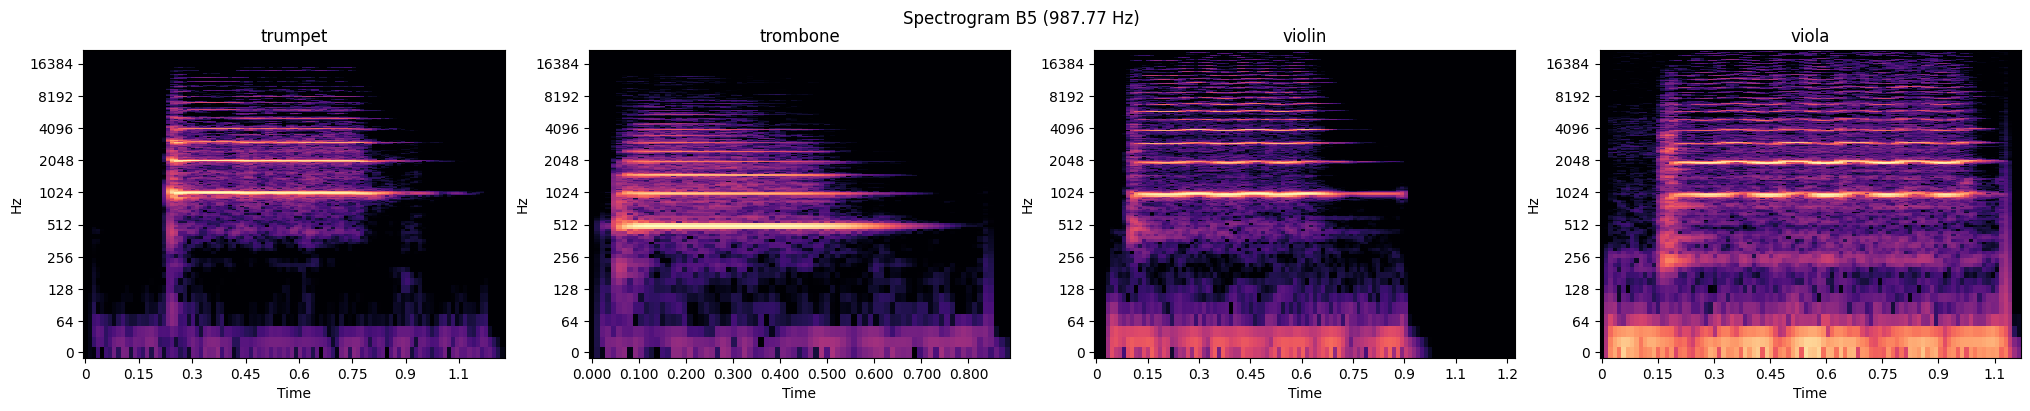

In [6]:
instrument_plot("B5")

### C5 - Frequency 523.25 Hz

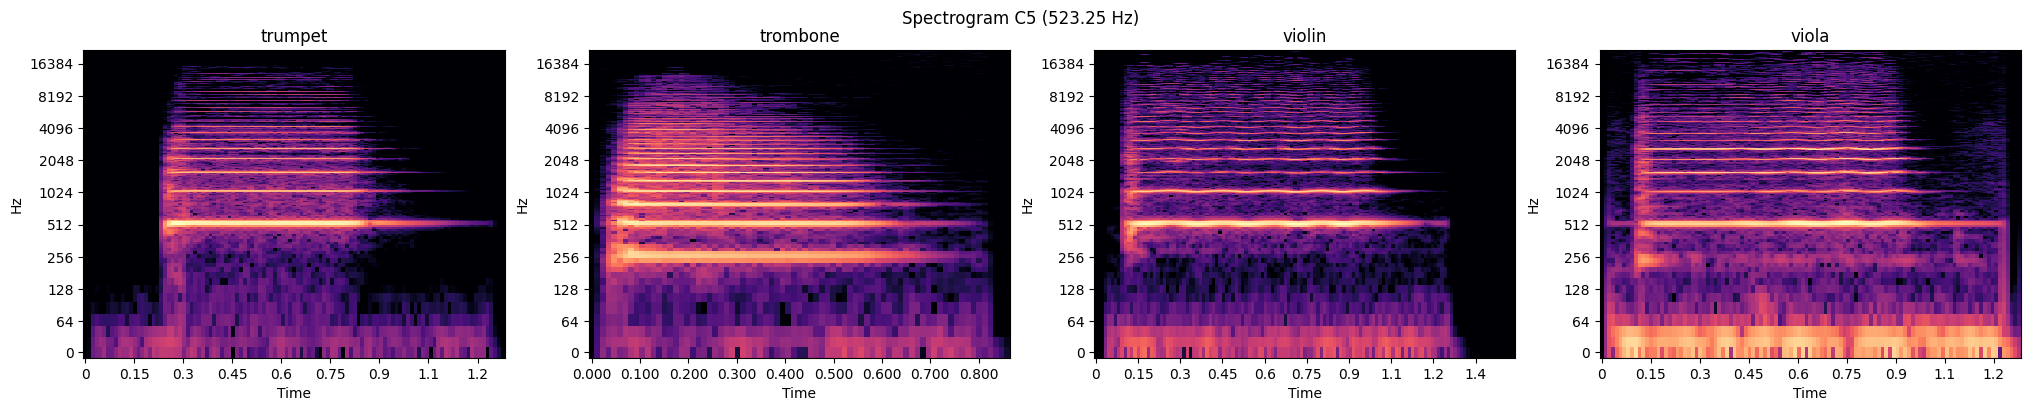

In [7]:
instrument_plot("C5")

### D5 - Frequency 587.33 Hz

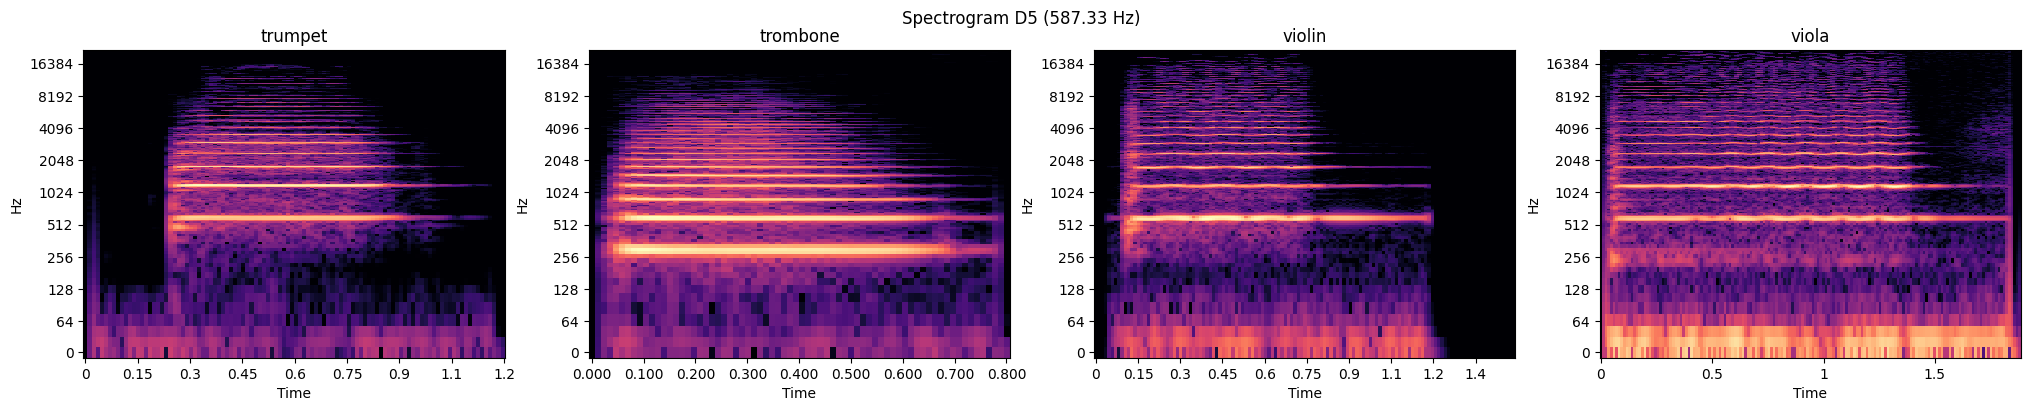

In [8]:
instrument_plot("D5")

### E5 - Frequency 659.26 Hz

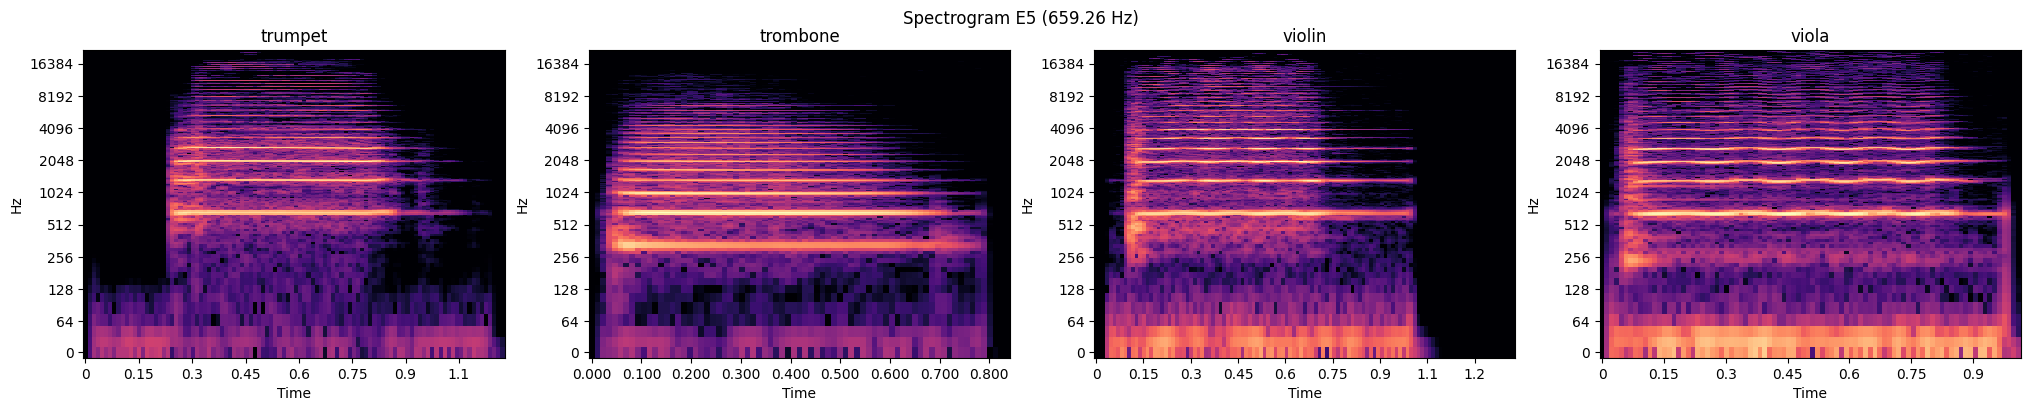

In [9]:
instrument_plot("E5")

### F5 - Frequency 698.46 Hz

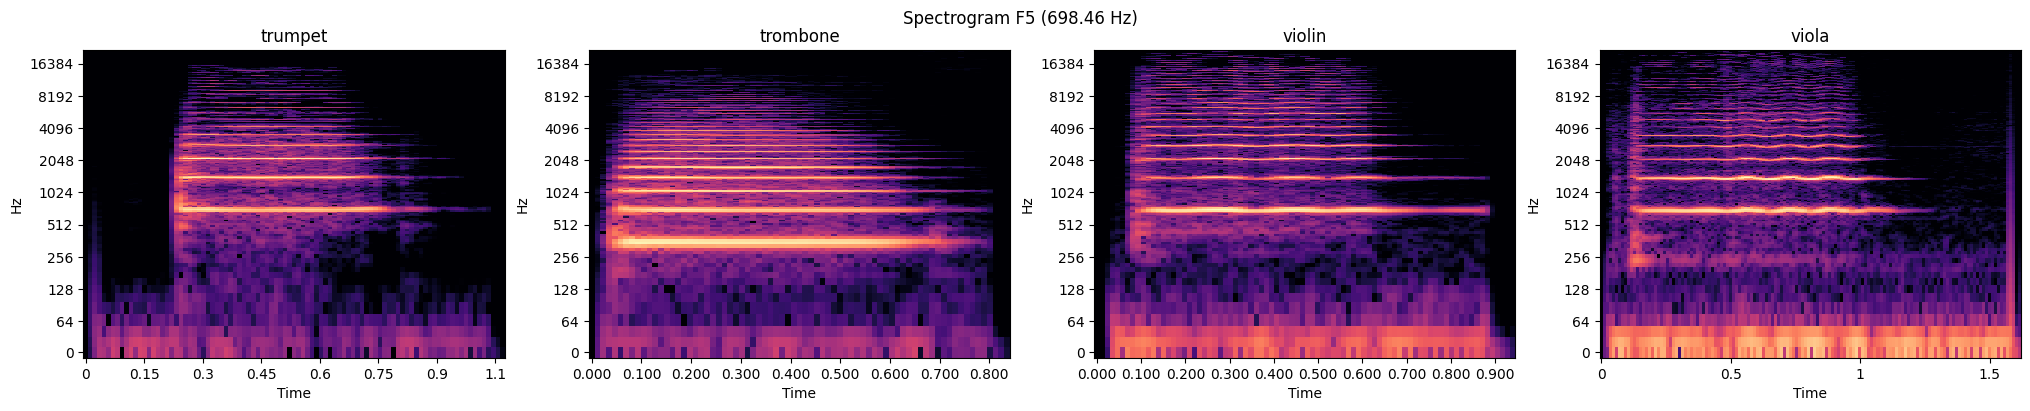

In [10]:
instrument_plot("F5")

### G5 - Frequency 783.99 Hz

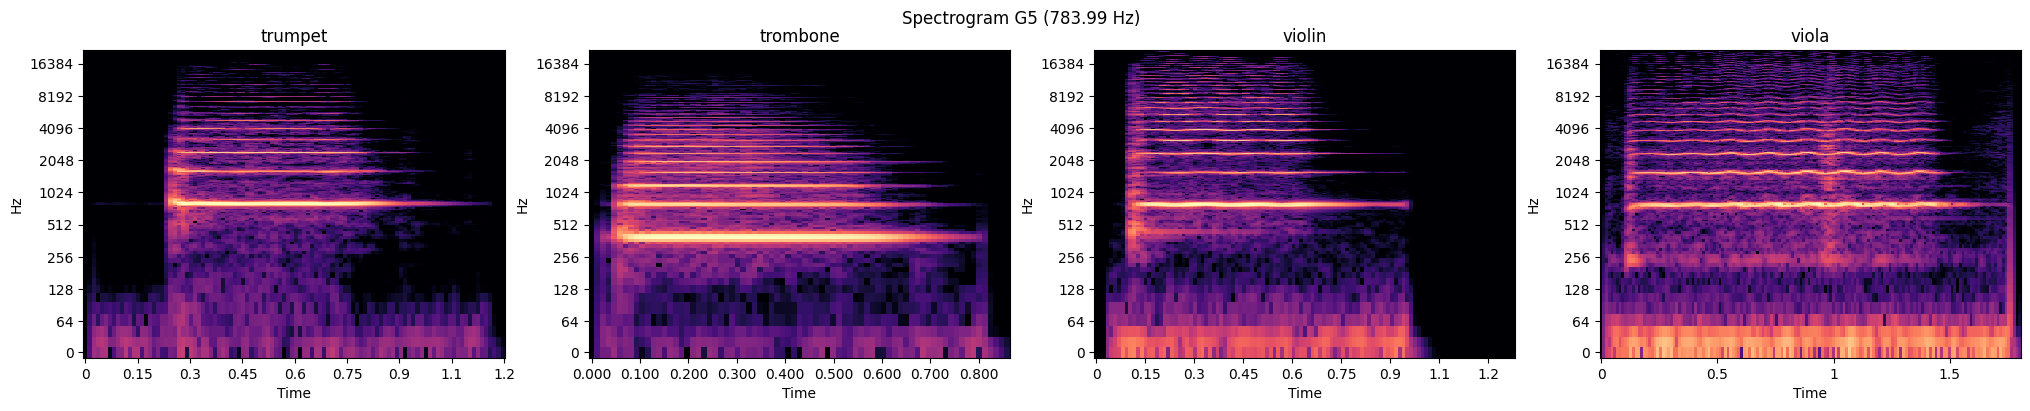

In [11]:
instrument_plot("G5")

## Analysis and Final Consideration

- violin and viola seems to have strong lower frequencies components, in particular viola;
- trombone seems to have around frequency component under the fundamental;

## Bibliography